# Activity Tracking Project
### Data Visualization (Primary)
Group 44: Abdellah Ghassel (20230384), Kyle Deverell (20217339), Liam O'Regan (20233042)

# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

## Load files

In [64]:
dataFiles = {
    "kyle": {
        "jumping": {
            "hand": "data/jumping/kjh_data.csv",
            "front": "data/jumping/kjf_data.csv",
            "back": "data/jumping/kjb_data.csv",
        },
        "walking": {
            "hand": "data/walking/kwh_data.csv",
            "front": "data/walking/kwf_data.csv",
            "back": "data/walking/kwb_data.csv",
        },
    },
    "abdellah": {
        "jumping": {
            "backright": "data/jumping/ajbrp_data.csv",
            "frontleft": "data/jumping/ajflp_data.csv",
        },
        "walking": {
            "backright": "data/walking/awbrp_data.csv",
            "frontleft": "data/walking/awflp_data.csv",
        },
    },
    "liam": {
        "jumping": {
            "backleft": "data/jumping/ljlbp_data.csv",
            "backright": "data/jumping/ljbrp_data.csv",
        },
        "walking": {
            "lefthand": "data/walking/lwlh_data.csv",
            "leftpocket": "data/walking/lwlp_data.csv",
            "righthand": "data/walking/lwrh_data.csv",
            "rightpocket": "data/walking/lwrp_data.csv",
        },
    },
}
    

In [51]:
activity_codes = {"jumping": 0, "walking": 1}

def preprocessData(person, activity, area):
    data = pd.read_csv(dataFiles[person][activity][area])
    data["Activity"] = activity_codes[activity]
    data = removeFiveSecRollFunc(data, 5)
    return data

#apply rolling average to smooth data
def removeFiveSecRollFunc(df, window_size):
    start = df["Time (s)"].min()
    end = df["Time (s)"].max()
    df = df[(df["Time (s)"] > start + 5) & (df["Time (s)"] < end - 5)]

    df = df.rolling(window_size).mean().dropna()
    return df

#function to plot pairplots and heatmaps
def visualizeData(person, activity, area):
    #concatenate all the areas
    df = preprocessData(person, activity, area)
    
    sns.pairplot(df)
    plt.suptitle(f'{person.capitalize()} {activity.capitalize()} Pair Plot', y=1.02, fontsize=14)
    plt.show()

    corr = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'{person.capitalize()} {activity.capitalize()} Correlation Heatmap', fontsize=14)
    plt.show()

#function to plot the acceleration data
def plotAccelData(preprocessed_data, person, activity):
    df = preprocessed_data[person][activity]
    
    fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
    
    axes[0].plot(df["Time (s)"], df["Linear Acceleration x (m/s^2)"], label="x-axis", color='red')
    axes[0].set_title(f"{activity.capitalize()} Activity for {person.capitalize()} (X-axis)")
    axes[0].set_ylabel("Acceleration (m/s^2)")
    axes[0].legend()

    axes[1].plot(df["Time (s)"], df["Linear Acceleration y (m/s^2)"], label="y-axis", color='blue')
    axes[1].set_title(f"{activity.capitalize()} Activity for {person.capitalize()} (Y-axis)")
    axes[1].set_ylabel("Acceleration (m/s^2)")
    axes[1].legend()

    axes[2].plot(df["Time (s)"], df["Linear Acceleration z (m/s^2)"], label="z-axis", color='green')
    axes[2].set_title(f"{activity.capitalize()} Activity for {person.capitalize()} (Z-axis)")
    axes[2].set_xlabel("Time (s)")
    axes[2].set_ylabel("Acceleration (m/s^2)")
    axes[2].legend()

    axes[3].plot(df["Time (s)"], df["Absolute acceleration (m/s^2)"], label="Absolute", color='pink')
    axes[3].set_title(f"{activity.capitalize()} Activity for {person.capitalize()} (Absolute Acceleration)")
    axes[3].set_xlabel("Time (s)")
    axes[3].set_ylabel("Acceleration (m/s^2)")
    axes[3].legend()

    plt.tight_layout()
    plt.show()

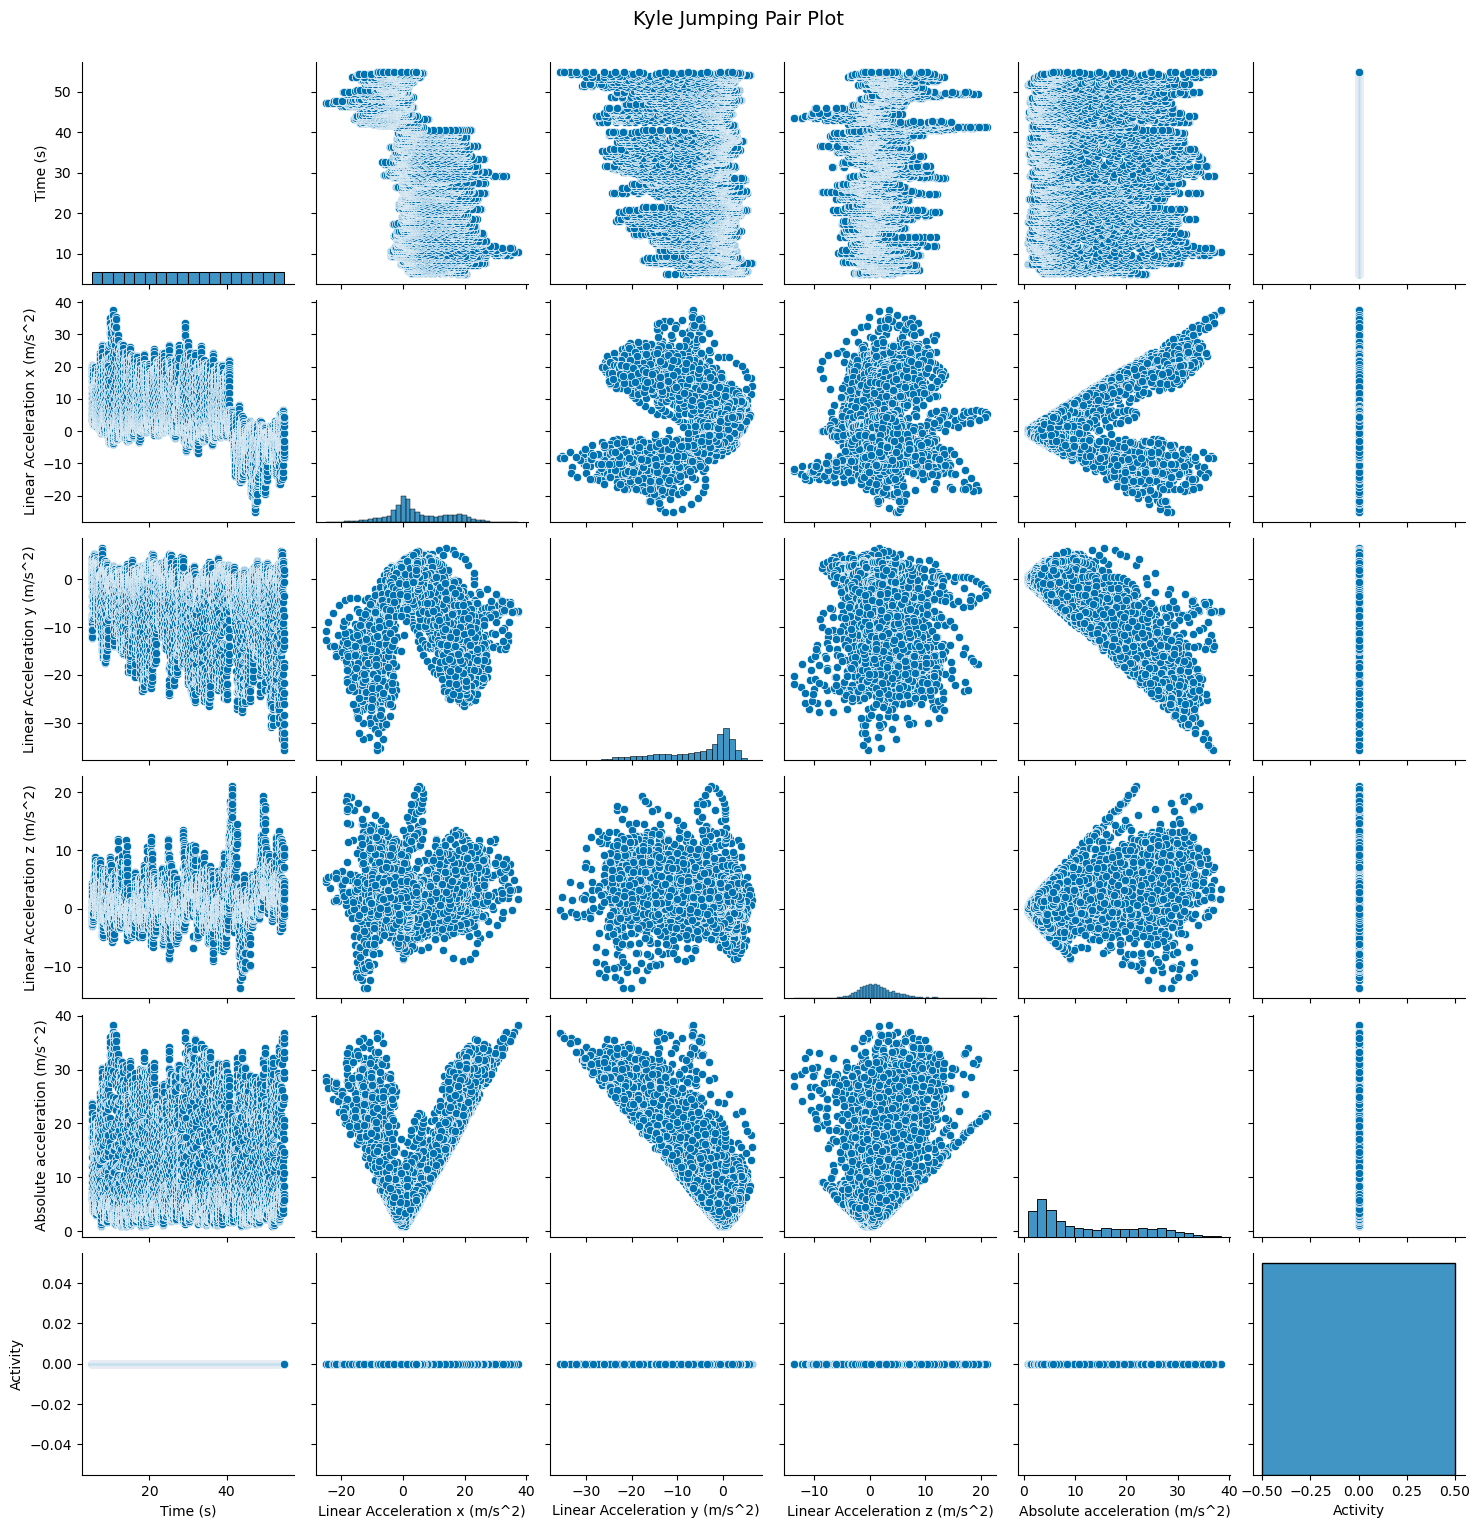

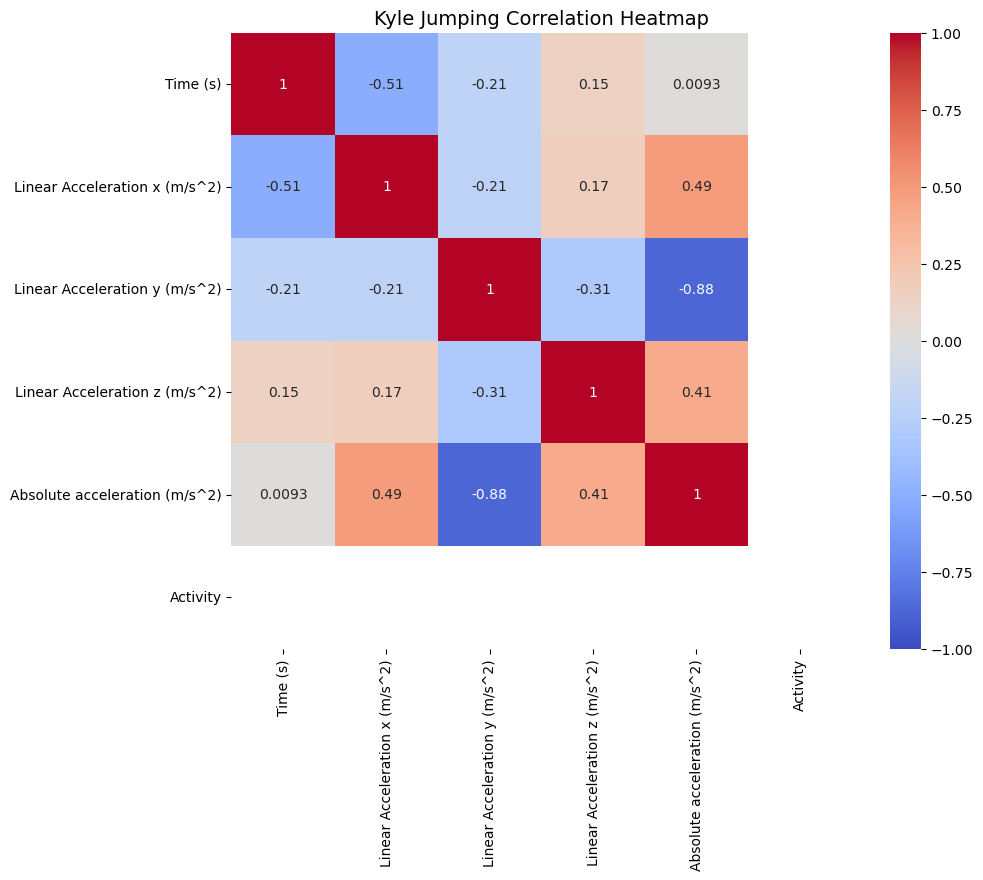

In [65]:
visualizeData("kyle", "jumping", "hand")

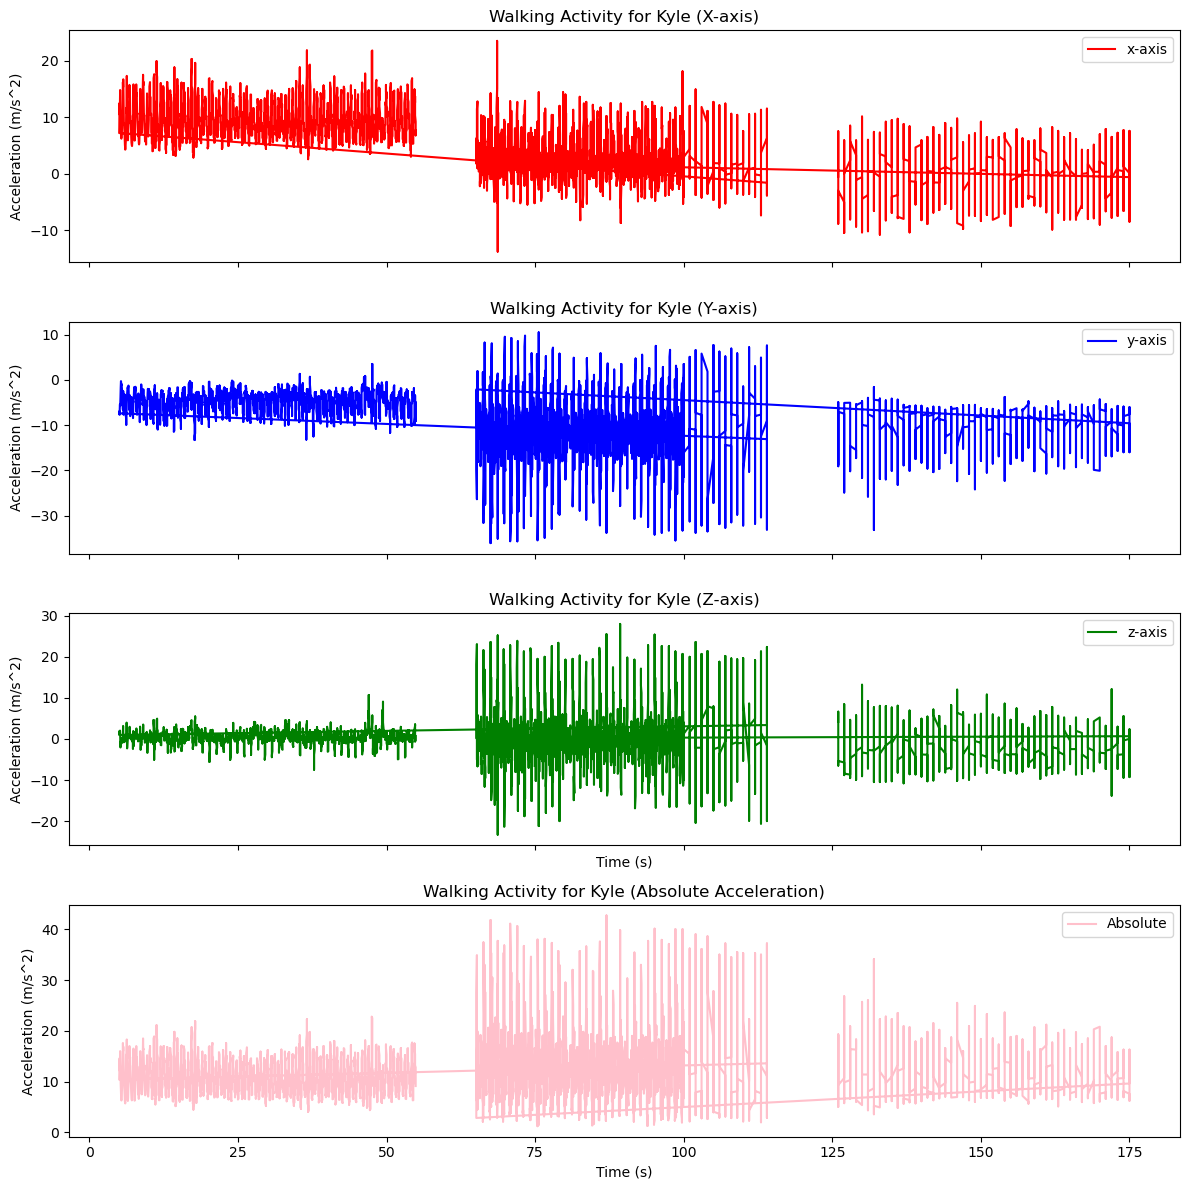

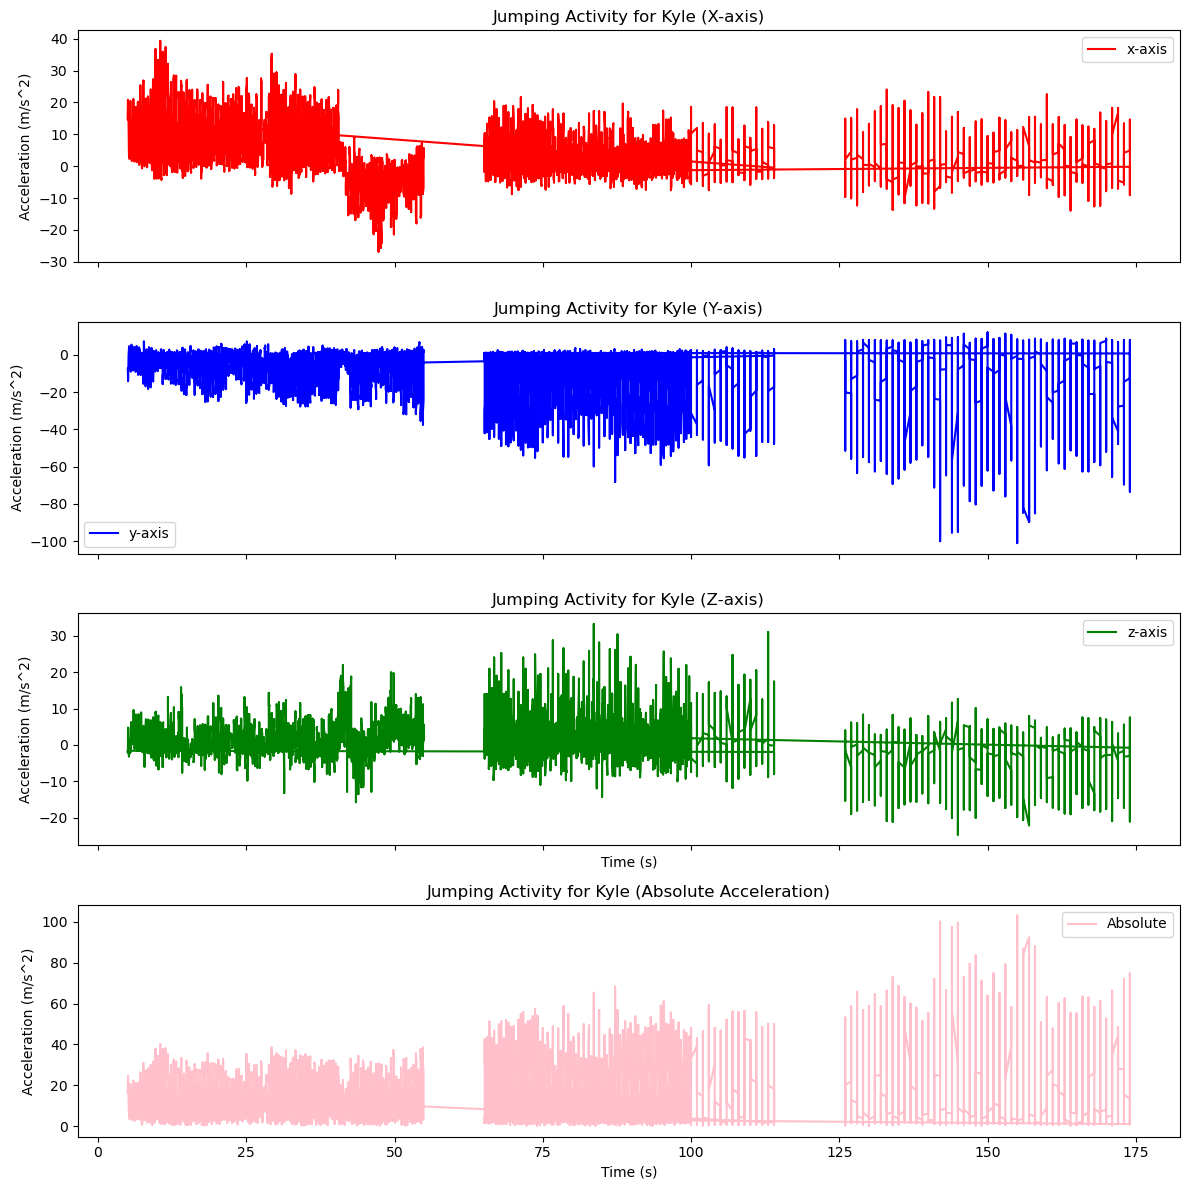

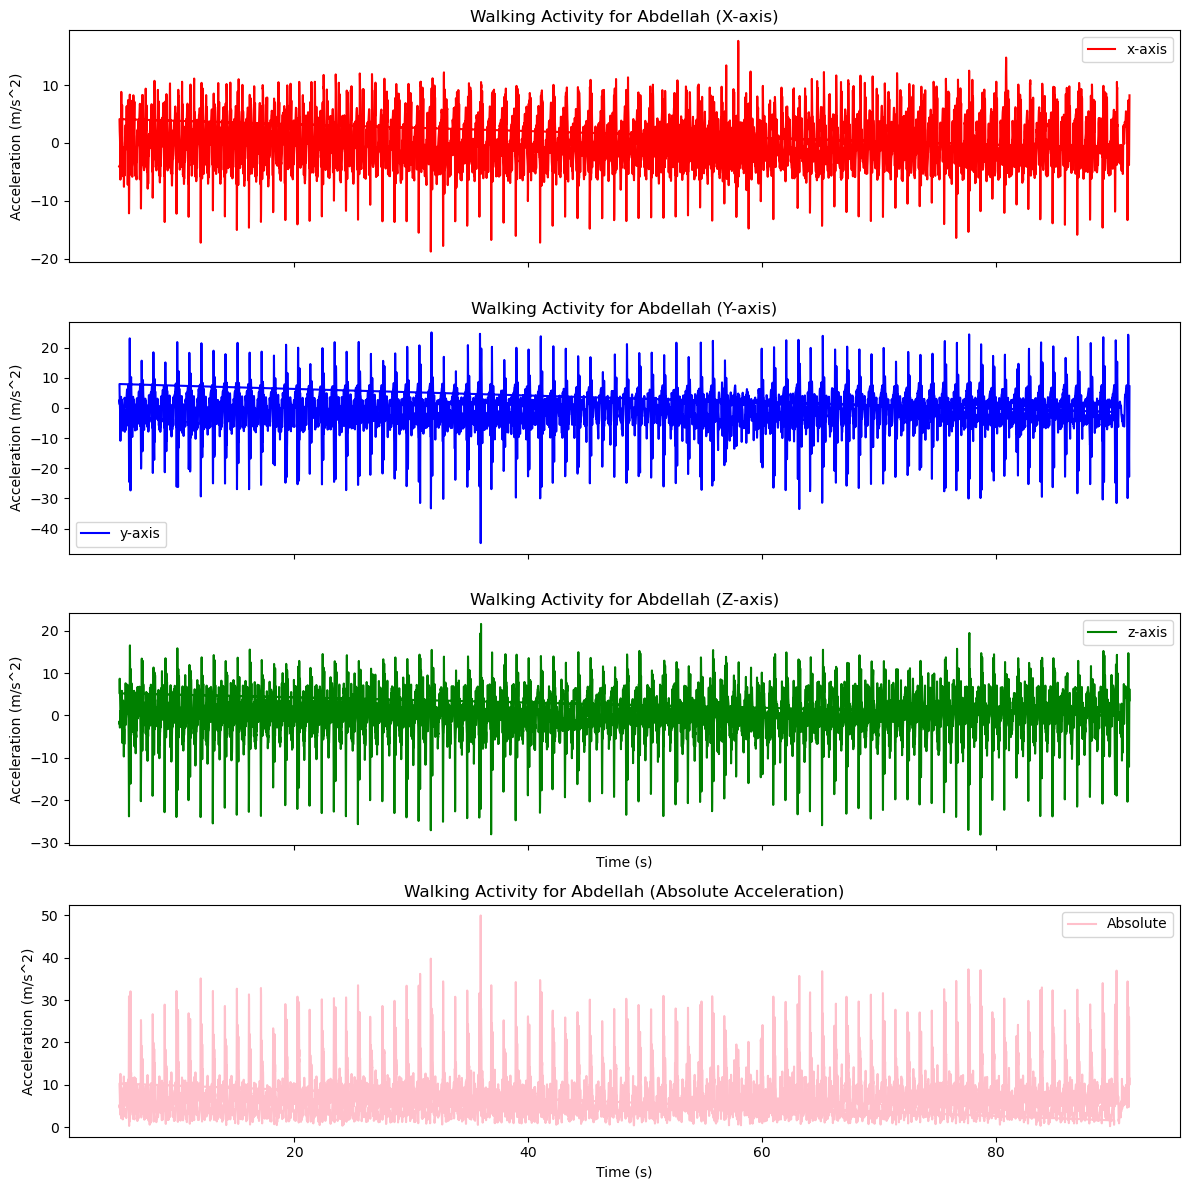

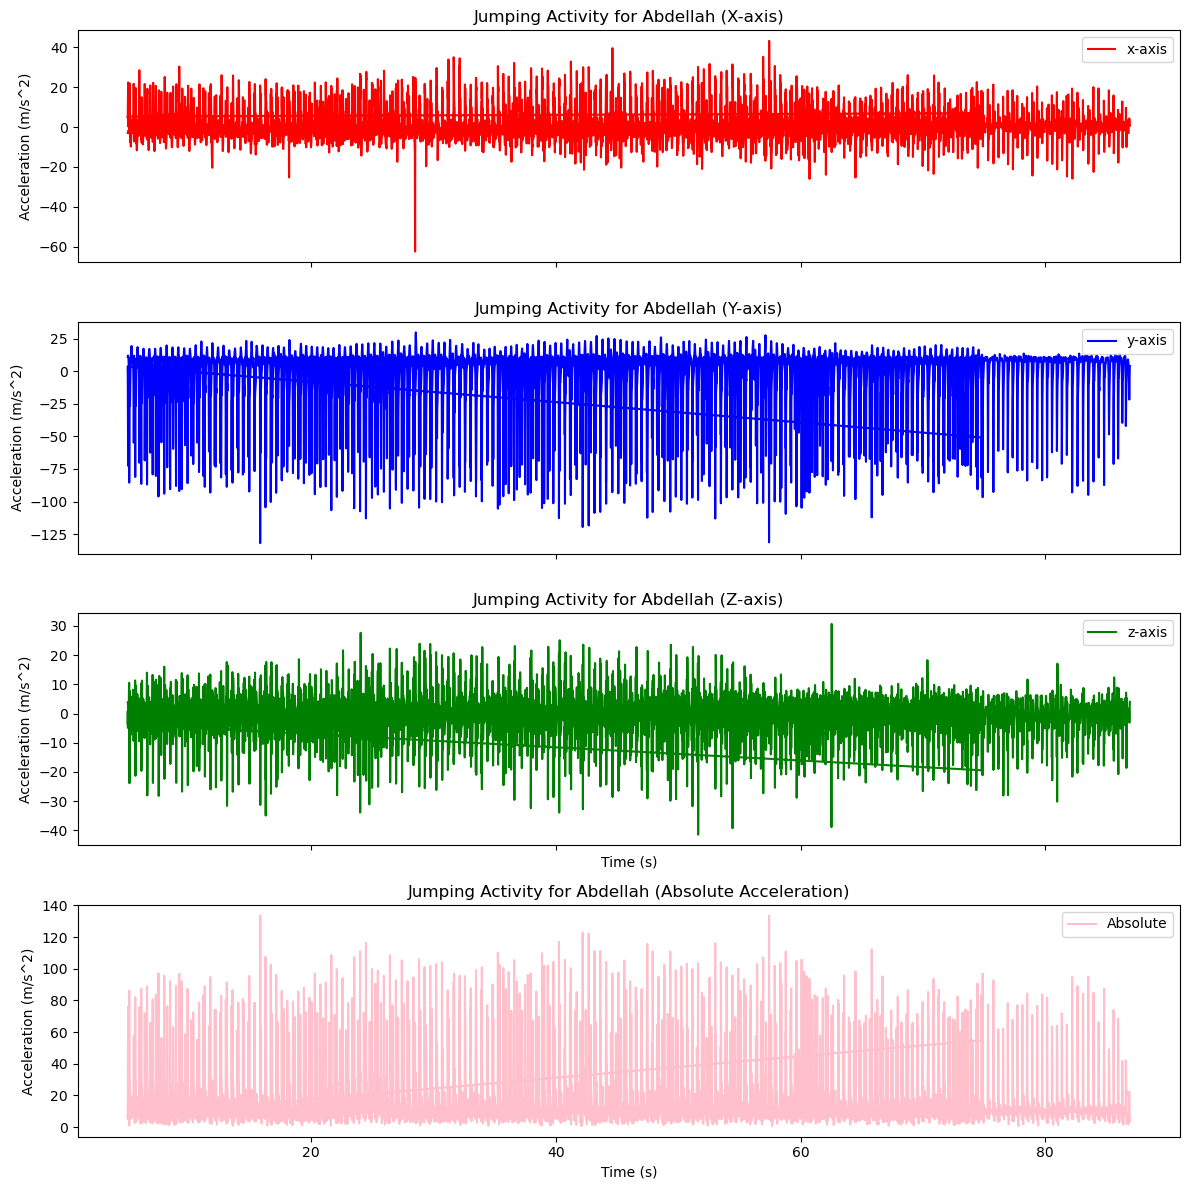

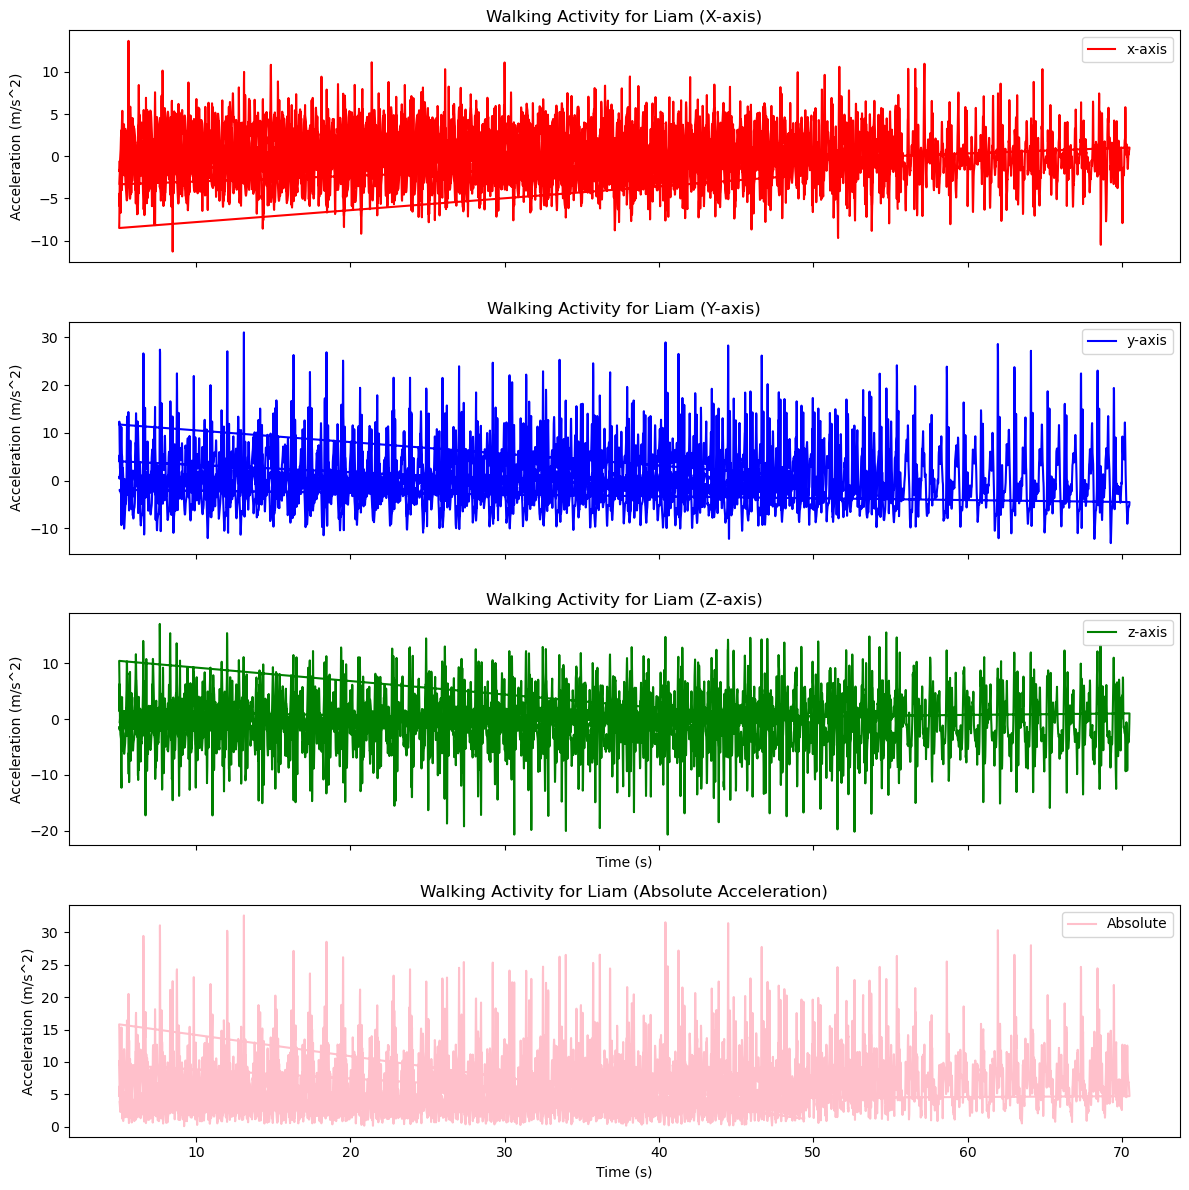

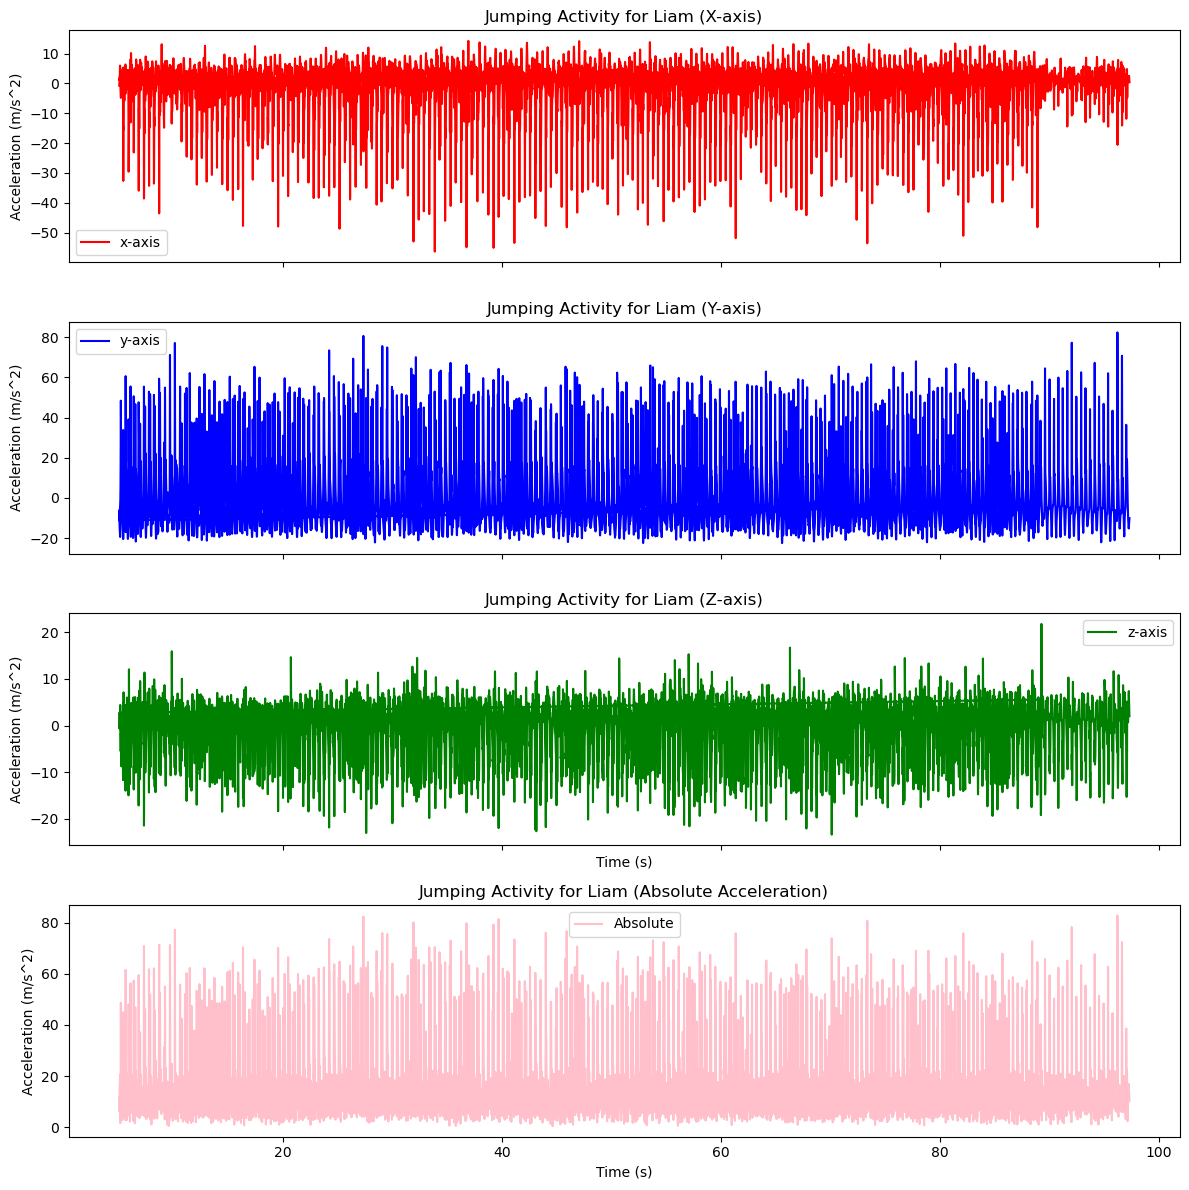

In [63]:
plotAccelData(preprocessed_data1, "kyle", "walking")
plotAccelData(preprocessed_data1, "kyle", "jumping")
plotAccelData(preprocessed_data1, "abdellah", "walking")
plotAccelData(preprocessed_data1, "abdellah", "jumping")
plotAccelData(preprocessed_data1, "liam", "walking")
plotAccelData(preprocessed_data1, "liam", "jumping")